In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys, os
opj = os.path.join
CODE_DIR = os.path.abspath('../..')
sys.path.append(opj(CODE_DIR, 'EPypes'))
sys.path.append(opj(CODE_DIR, 'RPALib'))
sys.path.append(opj(CODE_DIR, 'kacomponents'))

In [2]:
import operator
import cv2
from skimage import measure, feature, util, draw, transform, filters
from sklearn import model_selection, svm, naive_bayes, tree, ensemble, neighbors
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import ndimage
import math
import nxpd

nxpd.nxpdParams['show'] = 'ipynb'

In [3]:
import kavision
import mlearn
import ghelpers as gh
import imutils

from rpa.io import open_image

from epypes.compgraph import CompGraph, CompGraphRunner
from epypes.pipeline import Pipeline

In [4]:
def plot_point(pt, color='r'):
    plt.plot([pt[0]], [pt[1]], color + 'o')

In [5]:
setup_name = 'lamp6_goodfront'
imdir = opj(CODE_DIR, 'DATA/IMG/SWInspect2') 
im_fname = opj(imdir, setup_name + '_left.png')
im = open_image(im_fname)

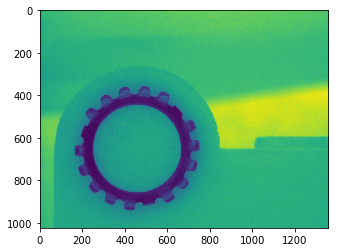

In [6]:
plt.imshow(im)

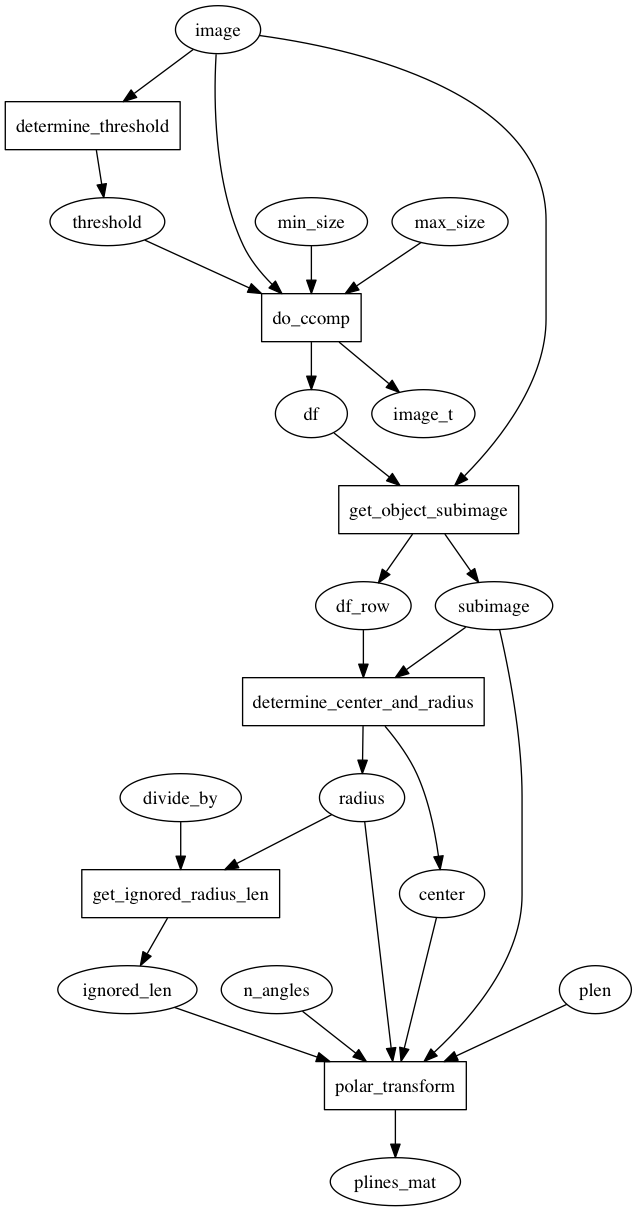

In [7]:
cg_inspect = CompGraph(
    
    func_dict = {
        'determine_threshold': filters.threshold_otsu,
        'do_ccomp': kavision.segment_good_objects,
        'get_object_subimage': kavision.get_object_subimage,
        'determine_center_and_radius': kavision.center_and_radius_in_subim,
        'get_ignored_radius_len': operator.truediv,
        'polar_transform': kavision.radial_profiles,
        
    }, 
    
    func_io = {
        'determine_threshold': ('image', 'threshold'),
        'do_ccomp': (('image', 'threshold', 'min_size', 'max_size'), ('df', 'image_t')),
        'get_object_subimage': (('image', 'df'), ('subimage', 'df_row')),
        'determine_center_and_radius': (('subimage', 'df_row'), ('center', 'radius')),
        'get_ignored_radius_len': (('radius', 'divide_by'), 'ignored_len'),
        'polar_transform': (('subimage', 'center', 'radius', 'n_angles', 'plen', 'ignored_len'), 'plines_mat'),
        
    }
)

nxpd.draw(cg_inspect.to_networkx())

In [8]:
params = {'divide_by': 1.5, 'min_size': 500, 'max_size': 600, 'plen': 50, 'n_angles': 100}

pipe = Pipeline('SWInspect', cg_inspect, frozen_tokens=params)
print('Required source tokens:', pipe.runner.required_source_tokens)

Required source tokens: {'image'}


In [9]:
pipe.run(image=im)

In [31]:
pipe.traverse_time()

('SWInspect',
 0.9825930595397949,
 (('determine_threshold', 0.01480722427368164),
  ('do_ccomp', 0.054421186447143555),
  ('get_object_subimage', 0.0027120113372802734),
  ('determine_center_and_radius', 8.082389831542969e-05),
  ('get_ignored_radius_len', 2.1457672119140625e-06),
  ('polar_transform', 0.9104199409484863)))

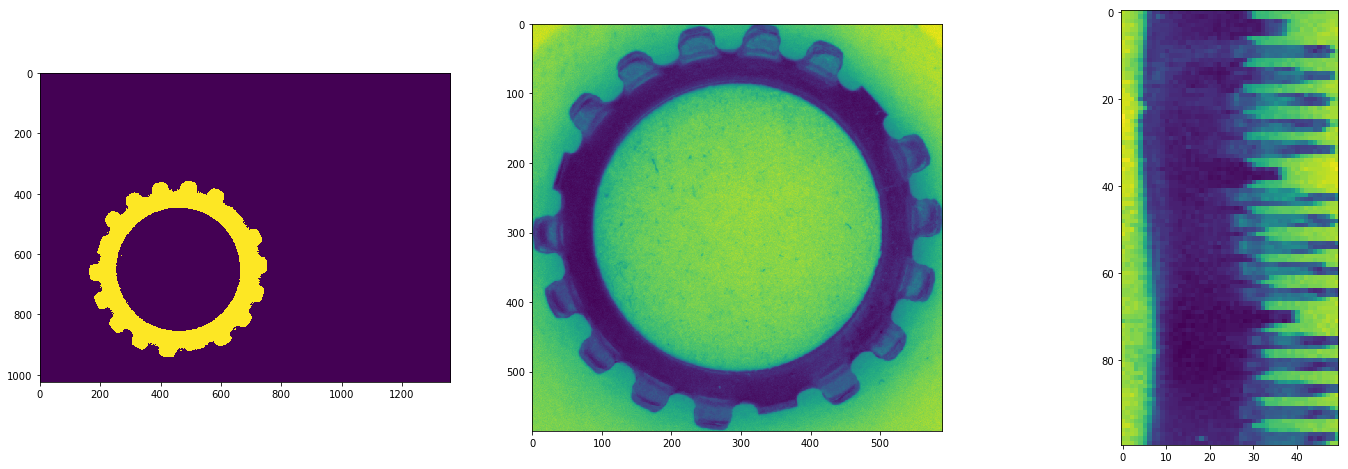

In [10]:
plt.figure(figsize=(25, 8))
plt.subplot(1, 3, 1)
plt.imshow(pipe['image_t'], interpolation='none')
plt.subplot(1, 3, 2)
plt.imshow(pipe['subimage'], interpolation='none')
plt.subplot(1, 3, 3)
plt.imshow(pipe['plines_mat'], interpolation='none')